<a href="https://colab.research.google.com/github/hmazzas/NBA-Salaries/blob/main/NBA_Salary_Prediction_2022_20233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA Salary Prediction



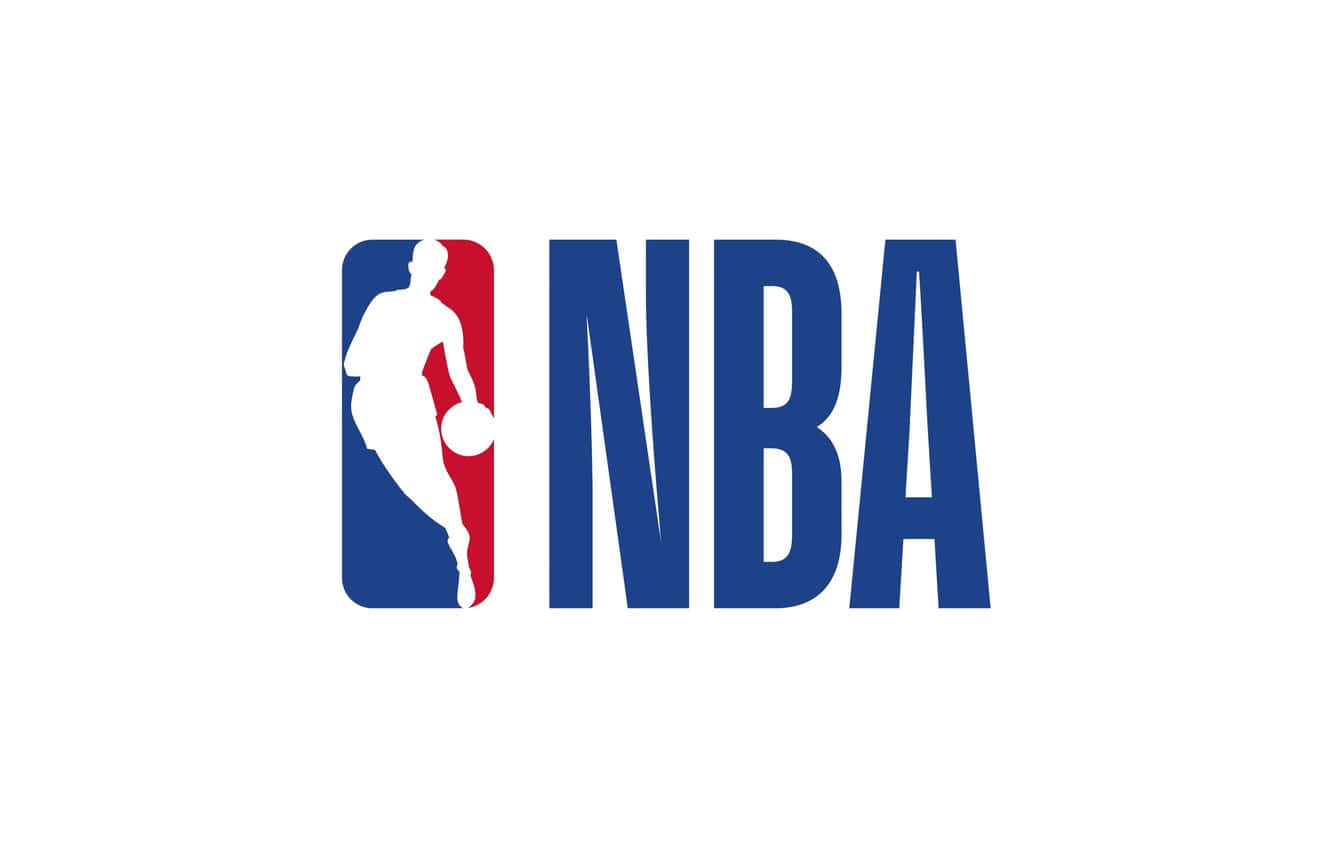

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1 Data Structure

In [ ]:
df = pd.read_csv("stats_salaries (5).csv")

In [ ]:
df.head()

,Unnamed: 0,id,position,Name,Team,Salary,games_played,fgm,fga,fg3m,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,0,115,G,Stephen Curry,Golden State Warriors,48070014,56,9.98,20.23,4.88,...,6.09,6.29,0.93,0.36,3.20,2.09,29.43,0.493,0.427,0.915
1,1,237,F,LeBron James,Los Angeles Lakers,44474988,56,11.09,22.14,2.21,...,8.34,6.80,0.91,0.61,3.27,1.66,28.93,0.501,0.324,0.770
2,2,140,F,Kevin Durant,Phoenix Suns,44119845,47,10.28,18.34,1.98,...,6.66,5.00,0.72,1.43,3.32,2.11,29.06,0.560,0.404,0.919
3,3,37,G,Bradley Beal,Washington Wizards,43279250,50,8.88,17.56,1.60,...,3.92,5.42,0.90,0.66,2.90,2.14,23.20,0.506,0.365,0.842
4,4,278,G,Damian Lillard,Portland Trail Blazers,42492492,58,9.59,20.72,4.21,...,4.78,7.33,0.86,0.31,3.29,1.88,32.17,0.463,0.371,0.914


In [ ]:
df.drop(["Unnamed: 0", "id"], axis=1, inplace = True)

## 1.1 Data Distribution

In [ ]:
df_hist = df.drop(['Name', "Team", "position"], axis=1)

In [ ]:
df_hist.describe()

,Salary,games_played,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
count,4.530000e+02,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,8.884683e+06,53.960265,3.639845,7.701258,1.063333,2.977792,1.591656,2.043377,0.921965,2.887925,3.810022,2.231126,0.642914,0.406755,1.195298,1.781766,9.933929,0.469172,0.322263,0.747792
std,1.052689e+07,21.081032,2.452451,5.005541,0.881151,2.277417,1.615140,1.958650,0.757151,1.780449,2.362904,1.945533,0.364485,0.384145,0.820068,0.722684,6.927920,0.089148,0.121209,0.157043
min,3.577170e+05,2.000000,0.000000,0.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.836090e+06,40.000000,1.870000,3.970000,0.370000,1.220000,0.560000,0.740000,0.390000,1.580000,2.130000,0.890000,0.360000,0.160000,0.600000,1.250000,4.950000,0.421000,0.294000,0.694000
50%,4.105000e+06,59.000000,3.000000,6.330000,0.870000,2.540000,1.040000,1.380000,0.730000,2.500000,3.340000,1.470000,0.590000,0.300000,0.960000,1.730000,8.020000,0.457000,0.348000,0.769000
75%,1.105512e+07,71.000000,4.810000,9.930000,1.570000,4.380000,2.050000,2.580000,1.160000,3.670000,4.850000,2.990000,0.860000,0.530000,1.570000,2.260000,13.070000,0.508000,0.386000,0.841000
max,4.807001e+07,84.000000,11.220000,22.140000,4.880000,11.410000,10.020000,12.250000,5.100000,9.600000,12.580000,10.660000,1.830000,3.000000,4.120000,3.810000,33.080000,0.819000,1.000000,1.000000


In [ ]:
df_hist.shape

(453, 20)

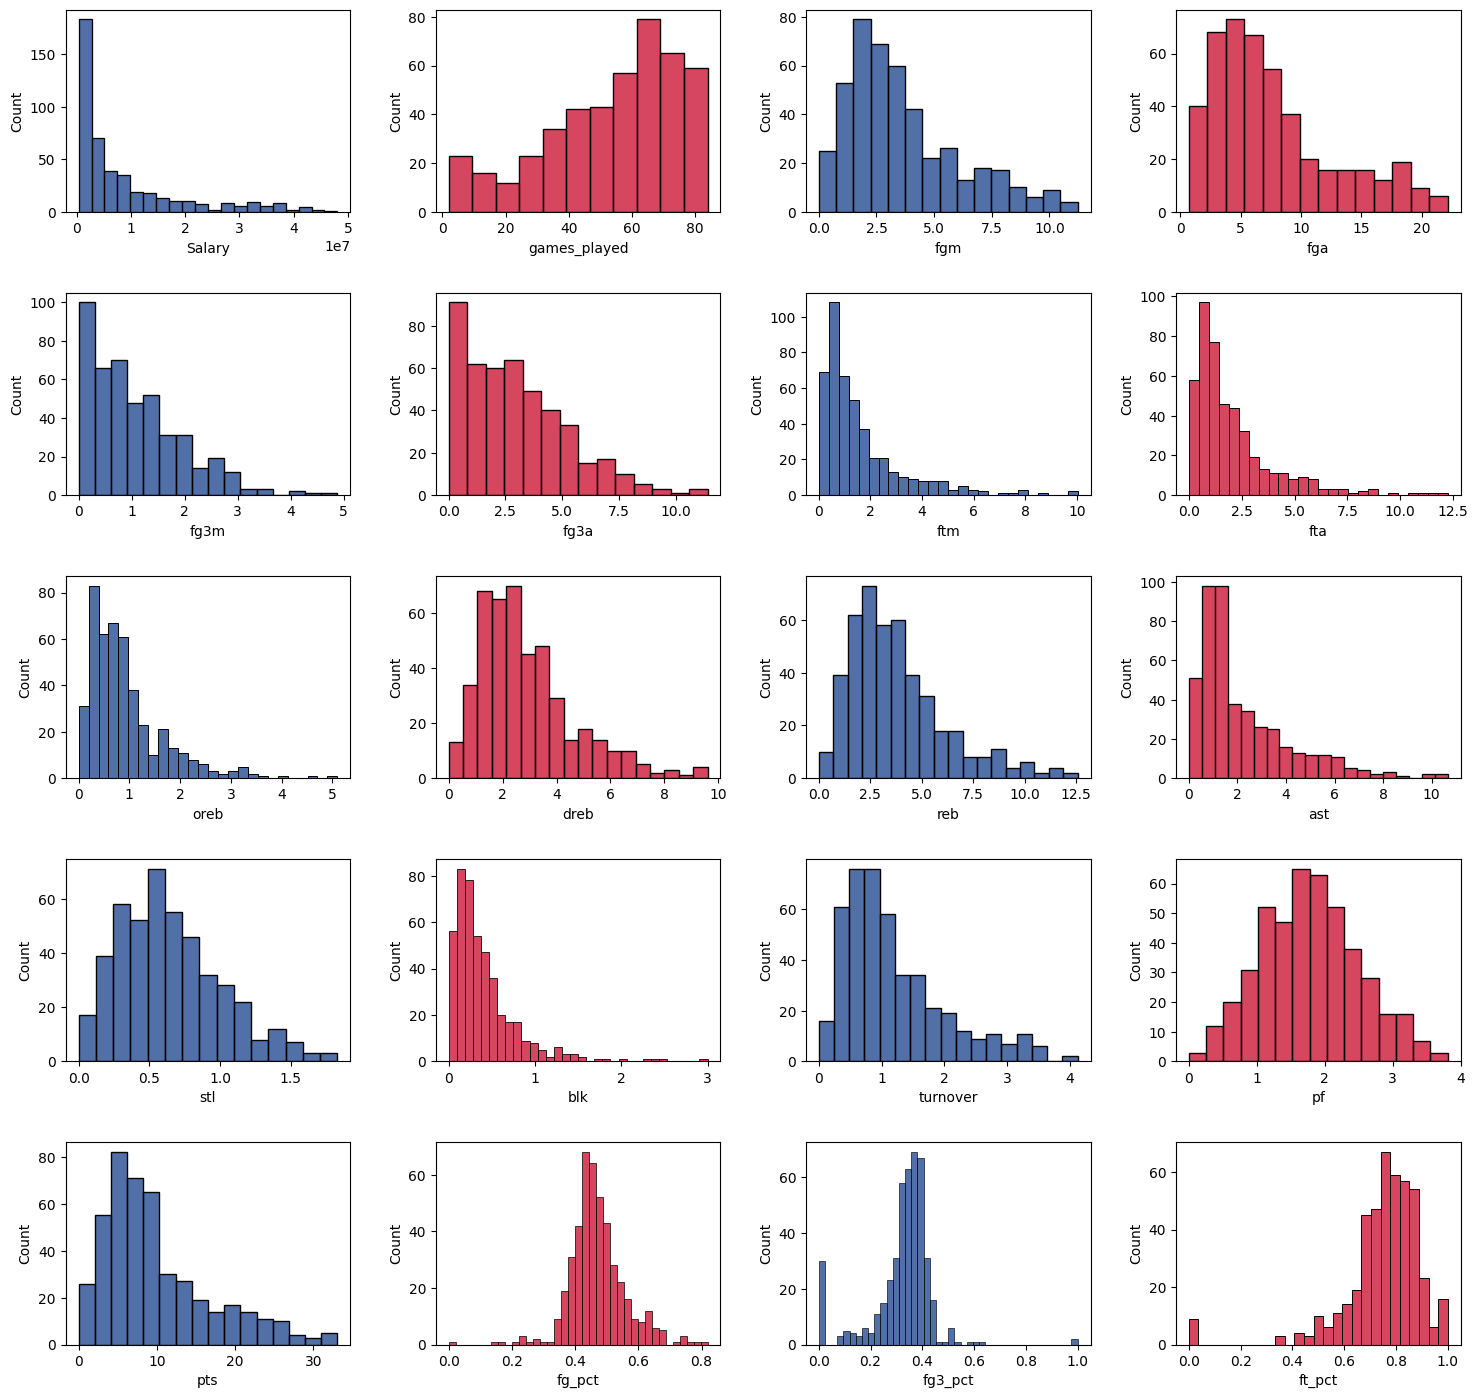

In [ ]:
x=0
fig, ax = plt.subplots(5, 4, figsize=(18, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for i, column in enumerate(df_hist.columns):
  plt.subplot(5, 4, i + 1)
  if x % 2 == 0:
    color='#17408b'
  else:
    color='#C9082A'
  sns.histplot(df_hist[column], color=color)
  x+=1

## 1.2 Data Correlation

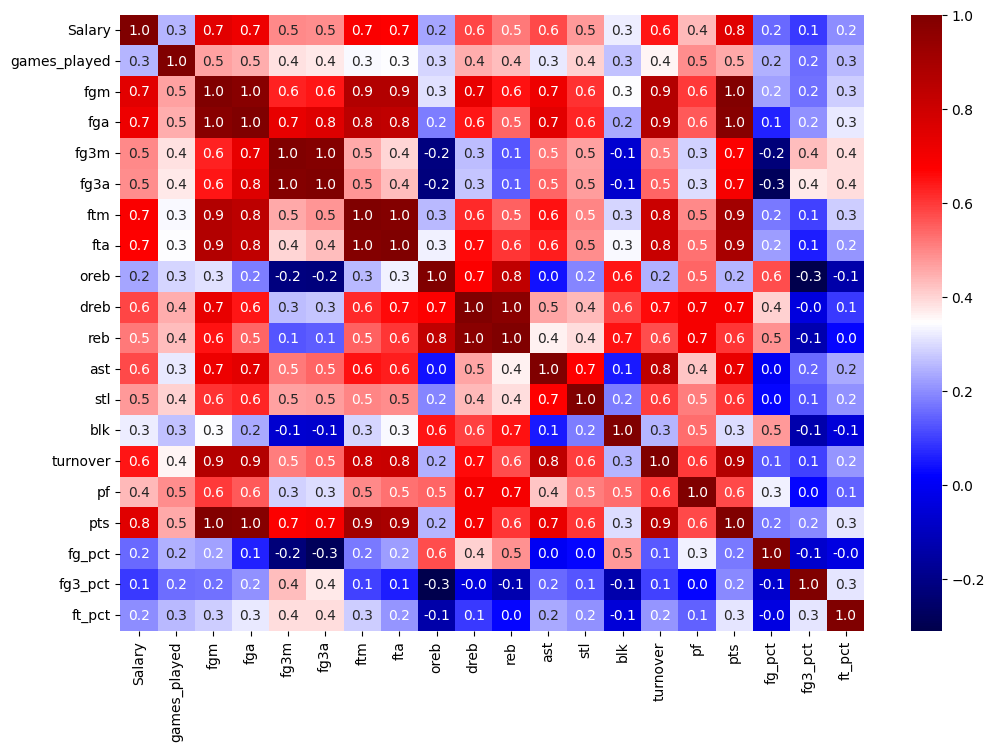

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_hist.corr(), cmap="seismic", annot=True, fmt=".1f")
plt.show()

Let see the correlation of each feature with the salary in a scatter plot:

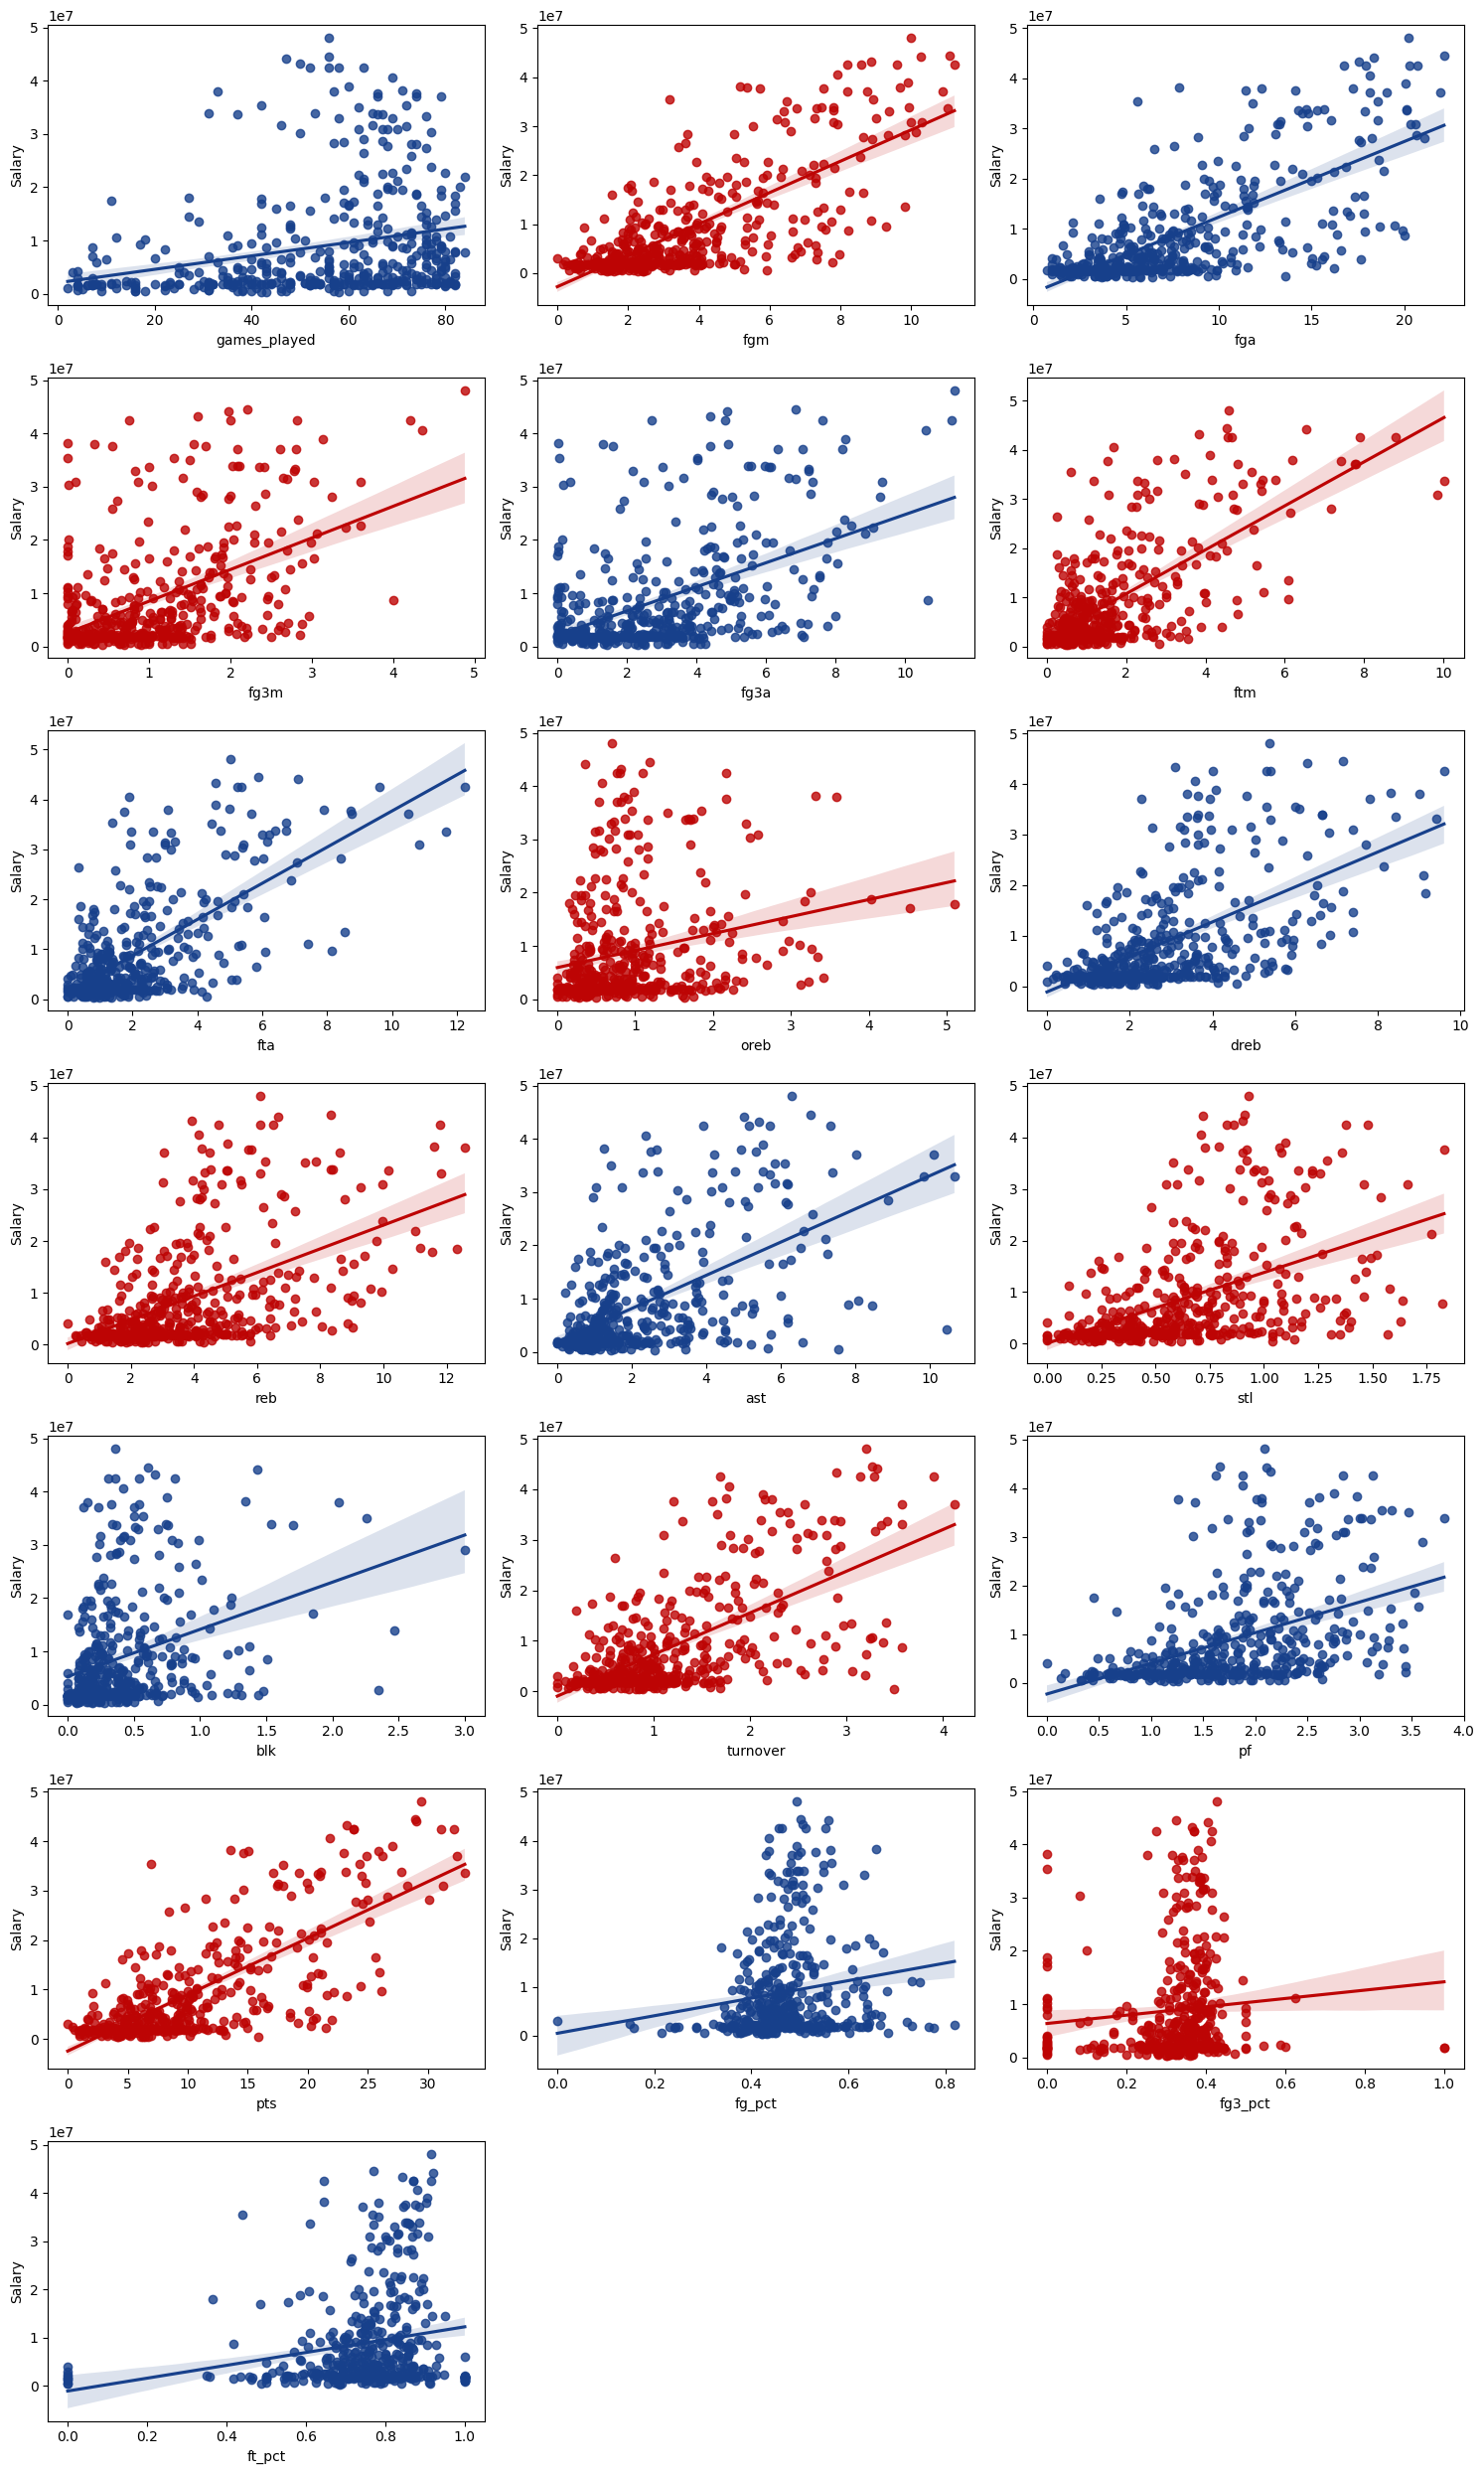

In [ ]:
plt.figure(figsize=(15,25))

for i, column in enumerate(df_hist.columns.drop('Salary')):
    if x % 2 == 0:
      color='#17408b'
    else:
      color='#bd0404'
    plt.subplot(7, 3, i + 1)
    sns.regplot(data=df_hist, x=column, y='Salary', color=color)
    x += 1
plt.tight_layout()

The first impression would point to a strange behavior in the positive correlation between salary and turnovers. But players who have more control of the ball and are involved in playmaking and scoring tend to have higher salaries. These players often handle the ball more frequently, make more passes, and take more shots, increasing their chances of committing turnovers. 

## 1.3 Preprossesing and Train-Test Split

In [ ]:
X = df_hist.drop(["Salary"], axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
Y = df_hist["Salary"].to_numpy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_test.shape

(91,)

# 2 Regression Models

## 2.1 Linear Regression

In [ ]:
lin = LinearRegression()
lin.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lin.score(X_train, Y_train)

0.6042439306157914

In [ ]:
y_hat_lin=lin.predict(X_test)
r2 = r2_score(Y_test, y_hat_lin)
print(r2)

0.7207402820105396


## 2.2 Ridge Regression

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000, 1500, 2000]}
rid = Ridge()

In [ ]:
rid_cv = GridSearchCV(rid, cv=10, param_grid=params)
rid_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000]})

In [ ]:
y_hat_rid=rid_cv.predict(X_test)
r2 = r2_score(Y_test, y_hat_rid)
print(r2)

0.7263654478362283


## 2.3 Lasso

In [ ]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, cv=10, param_grid=params)
lasso_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000]})

In [ ]:
y_hat_lasso=lasso_cv.predict(X_test)
r2 = r2_score(Y_test, y_hat_lasso)
print(r2)

0.7273897767928983


## 2.4 Elastic Net

In [ ]:
elastic = ElasticNet()
elastis_cv = GridSearchCV(elastic, cv=10, param_grid=params)
elastis_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000]})

In [ ]:
y_hat_elastis=elastis_cv.predict(X_test)
r2 = r2_score(Y_test, y_hat_elastis)
print(r2)

0.7241077893698606


## 2.4 Random Forest Regressor

In [ ]:
params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

rand_for = RandomForestRegressor()
rand_for_cv = GridSearchCV(rand_for, cv=10, param_grid=params)
rand_for_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
y_hat_rand=rand_for_cv.predict(X_test)
r2 = r2_score(Y_test,y_hat_rand)
print(r2)

0.6995531255104186


# 3 Conclusion

In [ ]:
metrics = {
    "Algoritm": ["Lin. Regression", "Ridge", "Lasso", "Elastic Net", "Random Forest"],
    "R2": [r2_score(Y_test, y_hat_lin), r2_score(Y_test, y_hat_rid), r2_score(Y_test, y_hat_lasso), r2_score(Y_test, y_hat_elastis), r2_score(Y_test,y_hat_rand)],
    "RMSE": [mean_squared_error(Y_test,y_hat_lin, squared=False), mean_squared_error(Y_test,y_hat_rid, squared=False), mean_squared_error(Y_test,y_hat_lasso, squared=False), mean_squared_error(Y_test,y_hat_elastis, squared=False), mean_squared_error(Y_test,y_hat_rand, squared=False)]
}
df_metrics = pd.DataFrame(metrics)
df_metrics

,Algoritm,R2,RMSE
0,Lin. Regression,0.720740,6.004683e+06
1,Ridge,0.726365,5.943898e+06
2,Lasso,0.727390,5.932763e+06
3,Elastic Net,0.724108,5.968369e+06
4,Random Forest,0.699553,6.228303e+06


Lin. Regression, Ridge and Lasso, and Elastic Net showed very similar R2-score results. Among them, Lasso regularization performed the best on the Training Set and had the smallest Root Mean Squared Error (RMSE).